# WELCOME!

In this assignment, apply ***EDA*** processes for the development of predictive models.

Also, this project aims to improve ability to implement algorithms for ***Multi-Class Classification***. 

Before diving into the project, please take a look at the determines and tasks.

# Determines

***Pen-Based Recognition of Handwritten Digits***
This digit database was created by collecting 250 samples from 44 writers. WACOM PL-100V pressure sensitive tablet used with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

In this study, researchers use only ($x, y$) coordinate information. The stylus pressure level values are ignored. The raw data that we capture from the tablet consist of integer values between 0 and 500 (tablet input box resolution). The new coordinates are such that the coordinate which has the maximum range varies between 0 and 100. Usually $x$ stays in this range, since most characters are taller than they are wide.

Attribute information
In order to train and test our classifiers, we need to represent digits as constant length feature vectors. A commonly used technique leading to good results is resampling the ( x_t, y_t) points. Temporal resampling (points regularly spaced in time) or spatial resampling (points regularly spaced in arc length) can be used here. Raw point data are already regularly spaced in time but the distance between them is variable.

- Data reference link : https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits
---

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (hand digit recognation) knowledge on the internet to get to know the data set in the fastest way.

Implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling.

After that, final dataset with the new variables will be ready for model building. Implement ***Support Vector Machine,Desicion Tree, Random Forest, XGBoost *** algorithms. Also, evaluate the success of models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*

#### 3. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('pendigits_txt.csv')
df.sample(5)

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
1435,29,83,60,100,78,64,56,27,13,2,0,19,52,18,100,0,2
10224,32,100,6,72,0,38,57,30,92,60,100,70,76,35,52,0,4
4006,0,84,47,100,100,98,75,76,50,55,92,35,77,9,25,0,3
3698,26,64,34,100,65,77,43,36,1,11,0,8,50,4,100,0,2
1399,83,100,36,82,11,61,0,39,78,35,100,41,67,21,53,0,4


#### *iii. Explore Data*
- Focus on numerical
- Focus on Target Variable (class)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


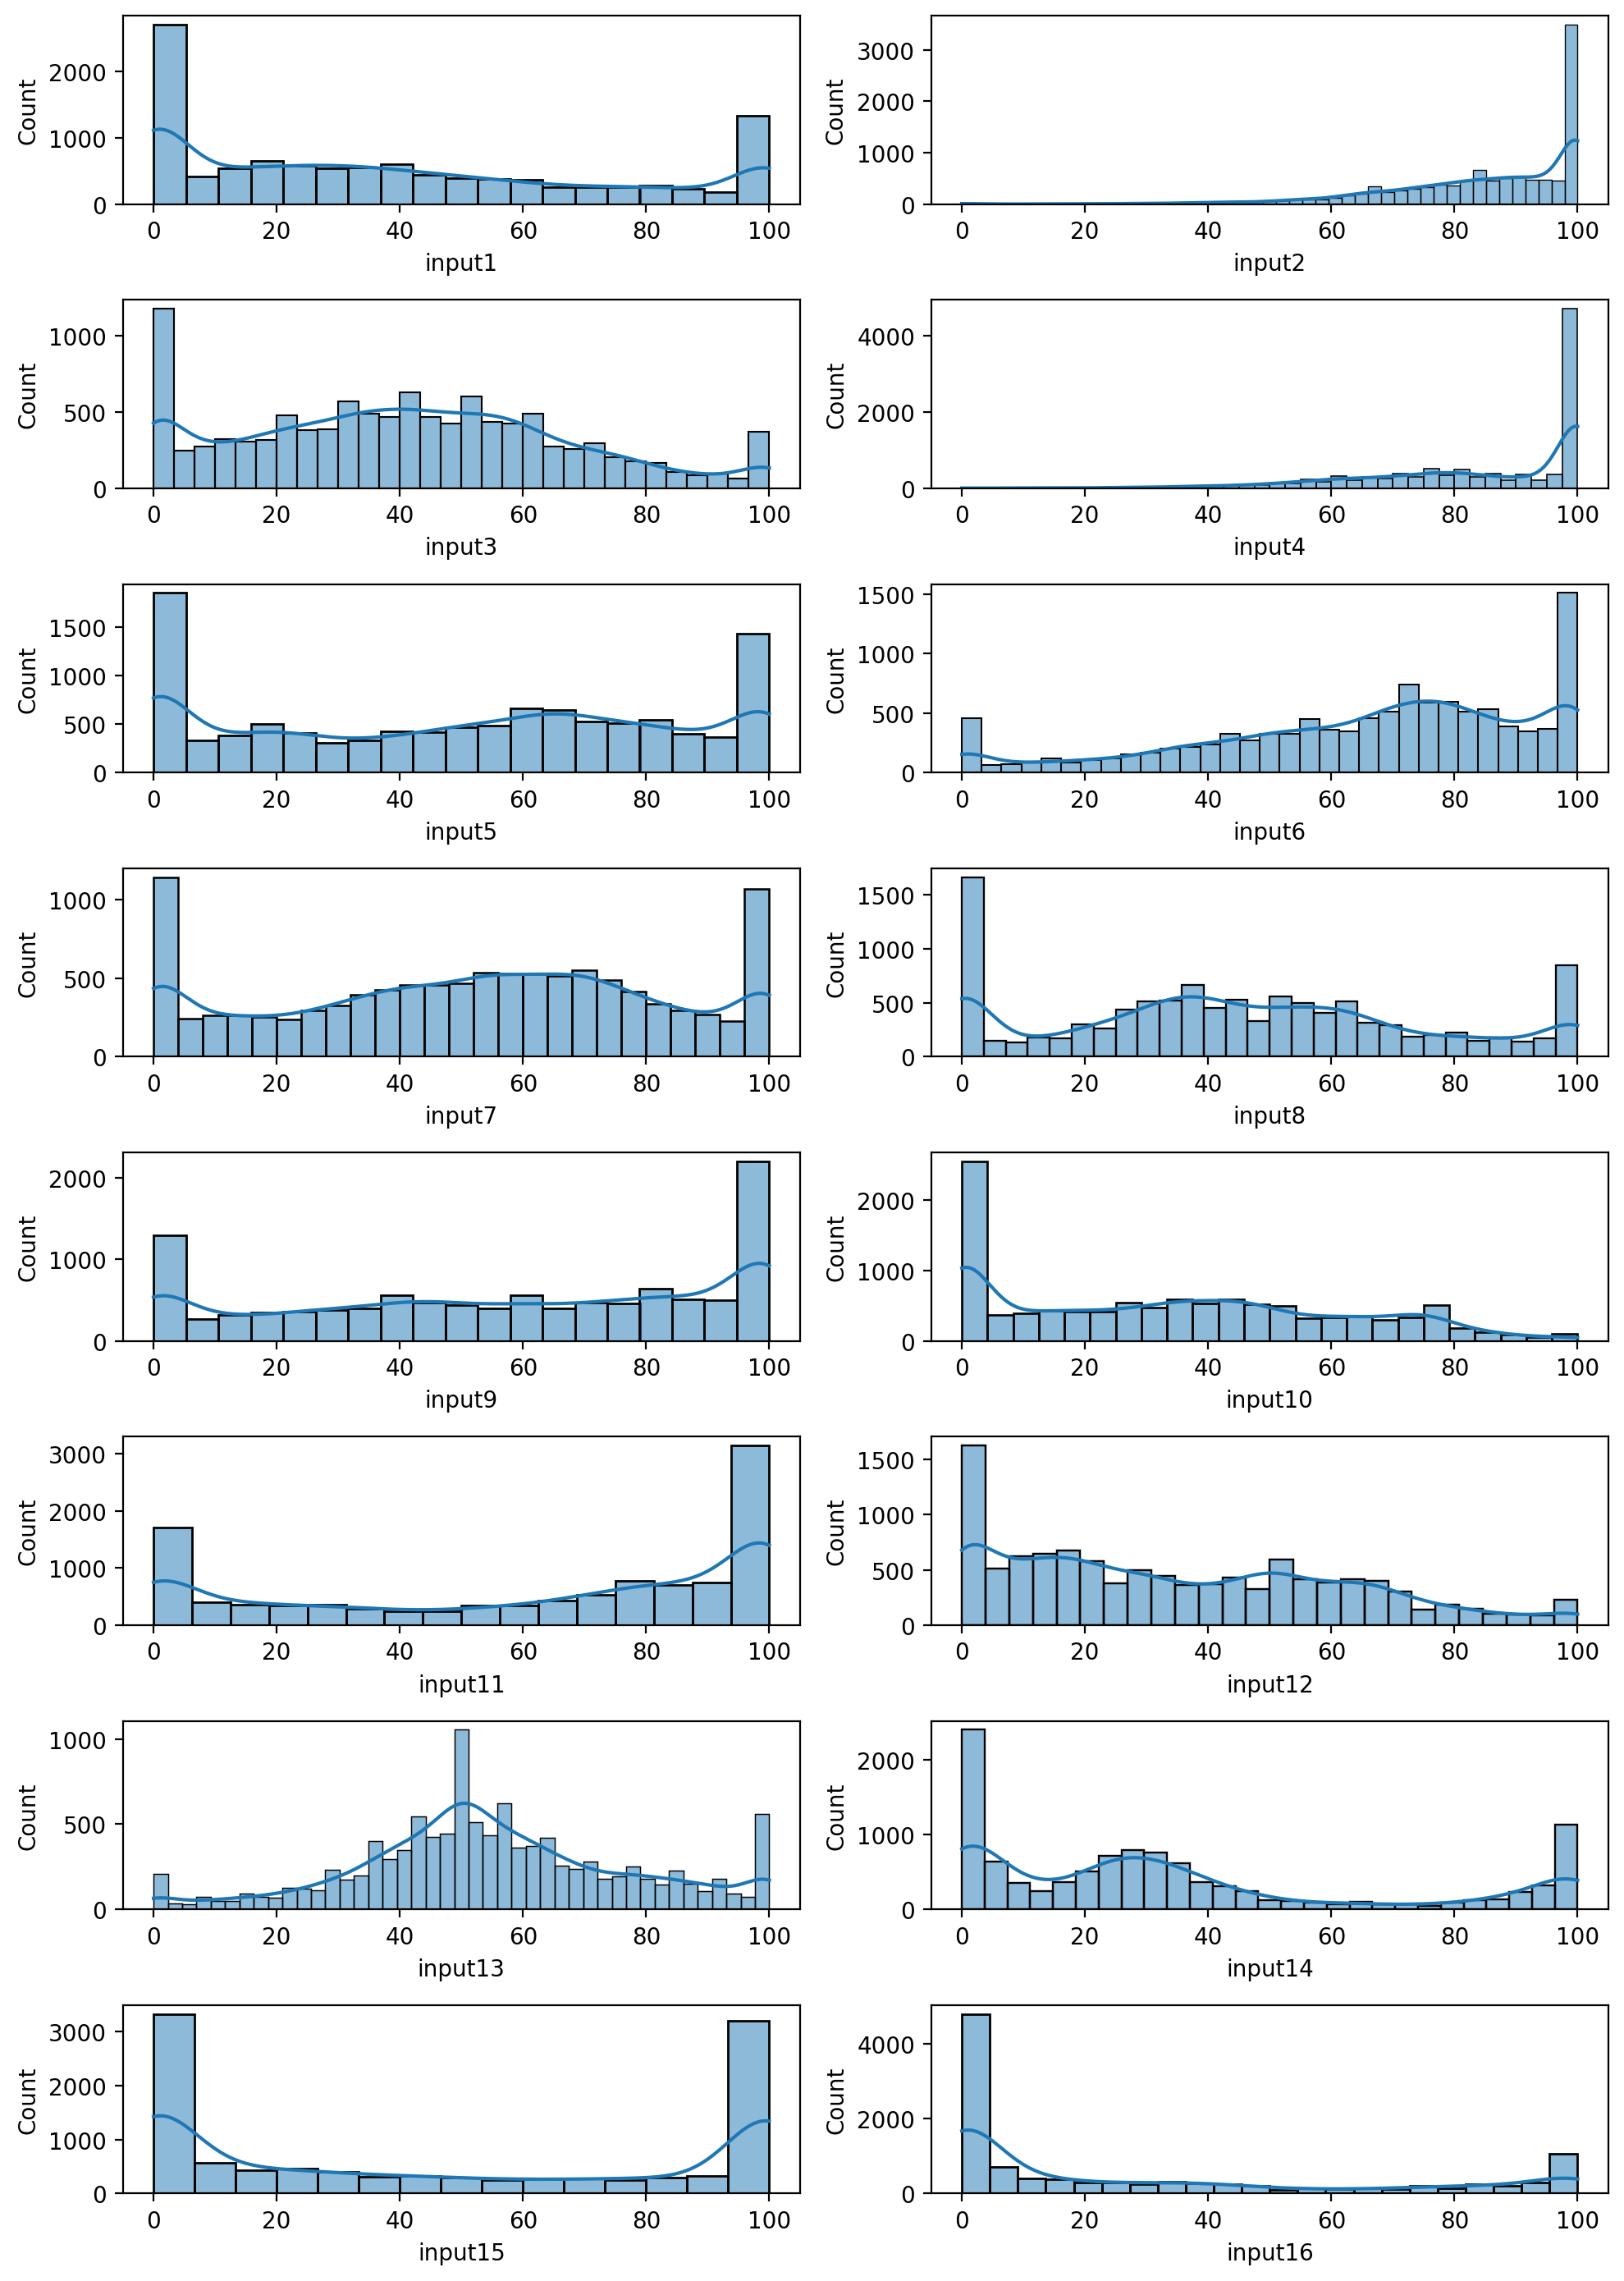

In [6]:
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.histplot(df[col],kde=True)
plt.tight_layout();

In [7]:
for i in df.columns:
    print('')
    print(f'Number of unique values of {i}:',df[i].nunique())


Number of unique values of input1: 101

Number of unique values of input2: 96

Number of unique values of input3: 101

Number of unique values of input4: 98

Number of unique values of input5: 101

Number of unique values of input6: 101

Number of unique values of input7: 101

Number of unique values of input8: 101

Number of unique values of input9: 101

Number of unique values of input10: 101

Number of unique values of input11: 101

Number of unique values of input12: 101

Number of unique values of input13: 101

Number of unique values of input14: 101

Number of unique values of input15: 101

Number of unique values of input16: 101

Number of unique values of class: 10


In [8]:
from ipywidgets import interact

In [9]:
def column_pair(col1,col2):
    sns.pairplot(df,
                 vars=[col1,col2],
                 hue="class",
                 height= 2,
                 aspect= 2,
                 palette='Dark2')
cols1 = df.columns
cols2 = df.columns
interact(column_pair, col1=cols1, col2=cols2);

interactive(children=(Dropdown(description='col1', options=('input1', 'input2', 'input3', 'input4', 'input5', …

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [10]:
df.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target ("class") classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [11]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [12]:
# Apply the custom formatting function to each row
styled_df = df.describe().T.style.apply(format_row_based_on_comparison, axis=1)

# Display the formatted DataFrame
styled_df

# From the dataframe below, we conclude that there are some outliers based on feature statsitics but not many

,count,mean,std,min,25%,50%,75%,max
input1,10992.000000,38.814320,34.257783,0.000000,6.000000,32.000000,65.000000,100.000000
input2,10992.000000,85.120269,16.218571,0.000000,76.000000,89.000000,100.000000,100.000000
input3,10992.000000,40.605622,26.342984,0.000000,20.000000,40.000000,58.000000,100.000000
input4,10992.000000,83.774199,19.163646,0.000000,72.000000,91.000000,100.000000,100.000000
input5,10992.000000,49.770378,34.100515,0.000000,18.000000,53.000000,78.000000,100.000000
input6,10992.000000,65.573144,26.996688,0.000000,49.000000,71.000000,86.000000,100.000000
input7,10992.000000,51.220251,30.576881,0.000000,28.000000,53.500000,74.000000,100.000000
input8,10992.000000,44.498999,29.906104,0.000000,23.000000,43.000000,64.000000,100.000000
input9,10992.000000,56.868541,34.135530,0.000000,29.000000,60.000000,89.000000,100.000000
input10,10992.000000,33.695961,27.251548,0.000000,7.000000,33.000000,54.000000,100.000000


In [13]:
#df.plot(by ='class', kind="box", subplots=True, layout=(4,4), figsize=(10, 10), vert=False, sharex=False, sharey=False)
#plt.tight_layout();

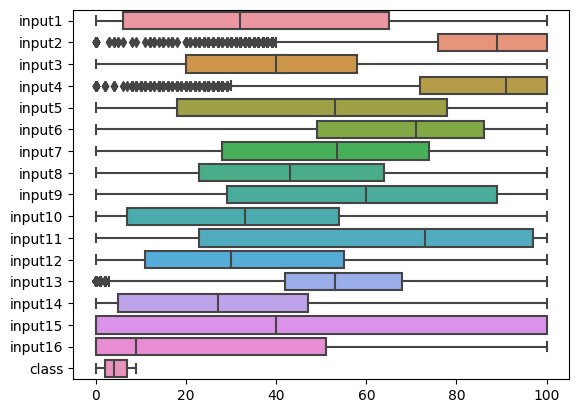

In [14]:
sns.boxplot(data=df,orient='h');

In [15]:
#input 2, 4 and 13 have outliers

### Deal with Outliers

- Warning : Observe the scores before and after dropping the outliers

<Axes: >

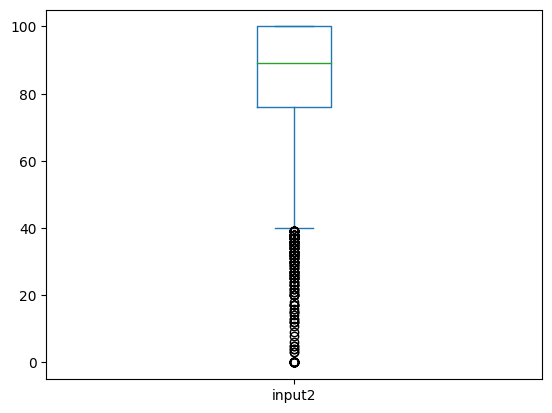

In [16]:
df.input2.plot.box()

In [17]:
len(df[df.input2<40])

196

<Axes: >

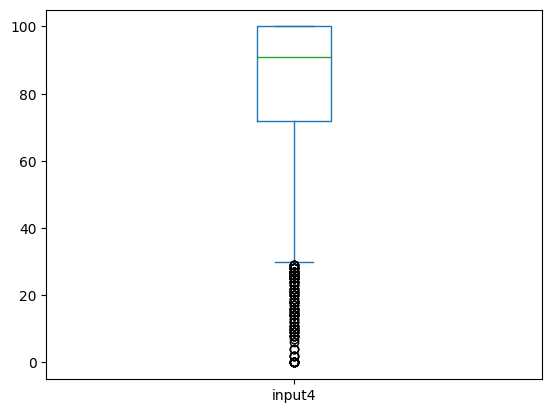

In [18]:
df.input4.plot.box()

In [19]:
len(df[df.input4<33])

185

<Axes: >

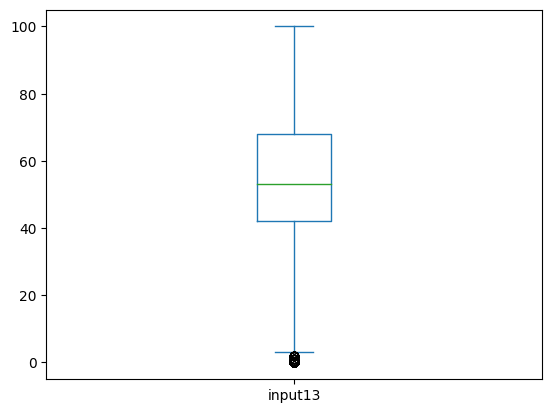

In [20]:
df.input13.plot.box()

In [21]:
len(df[df.input13<1])

186

### My target column is `class`. So let's take a close look at this column.

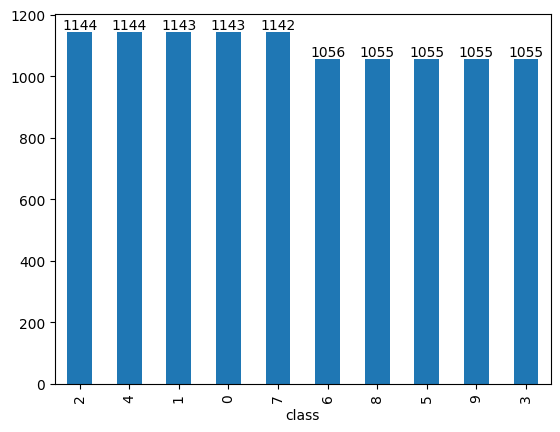

In [22]:
ax = df['class'].value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [23]:
# data set is balanced

### Now, let's take a closer look at correlation of continuous columns.

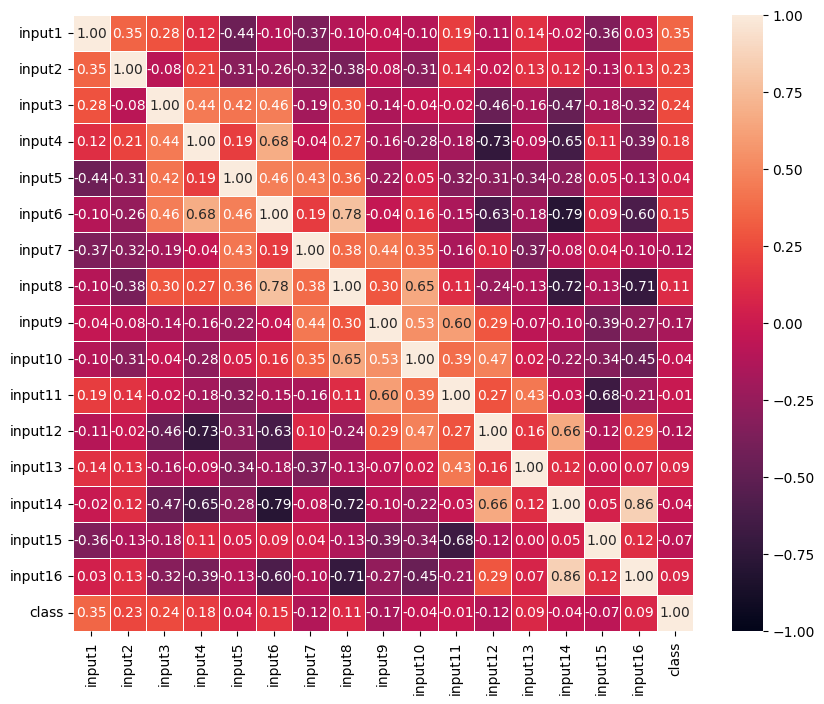

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True, fmt='.2f', linewidths=0.5);

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = dataframe.copy()
    vif_data = vif_data.select_dtypes(include=['number'])  # Only numeric columns
    
    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame()
    vif_df["Feature"] = vif_data.columns
    vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    
    return vif_df

In [26]:
vif_result = calculate_vif(df)
vif_result

,Feature,VIF
0,input1,6.720544
1,input2,48.886874
2,input3,11.923757
3,input4,95.506757
4,input5,17.562958
5,input6,81.164943
6,input7,20.026695
7,input8,48.413940
8,input9,22.881400
9,input10,25.317995


***
***

## 3. Prediction (Multi-class Classification)

In this section, there are two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``SVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module)
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report
 - ROC/AUC Curve

### Import Libraries

In [27]:
#!pip install yellowbrick

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

### Data Preprocessing

In [29]:
X = df.drop('class', axis=1)
y = df['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Implement Support Vector Machine
- Import the modul
- Fit the model
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)


#### Vanilla SVC

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
operations = (('scaler', MinMaxScaler()),('svc', SVC()))
pipeSVC = Pipeline(operations)

In [33]:
pipeSVC.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(pipeSVC, X_train, y_train, X_test, y_test)

Test_Set
[[238   0   0   0   0   0   1   0   0   0]
 [  0 214   1   1   0   0   0   1   0   1]
 [  0   1 232   0   0   0   0   0   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   2   0 212   0   0   0   0]
 [  0   0   0   0   0   0 228   0   0   0]
 [  0   1   0   0   0   0   0 245   0   0]
 [  0   0   0   0   0   1   0   1 197   0]
 [  0   0   0   0   0   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.98      0.99       218
           2       0.99      1.00      0.99       233
           3       0.98      0.99      0.99       191
           4       1.00      1.00      1.00       242
           5       1.00      0.99      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      1.00      0.99       246
           8       1.00      0.99      0.99       199
           9       

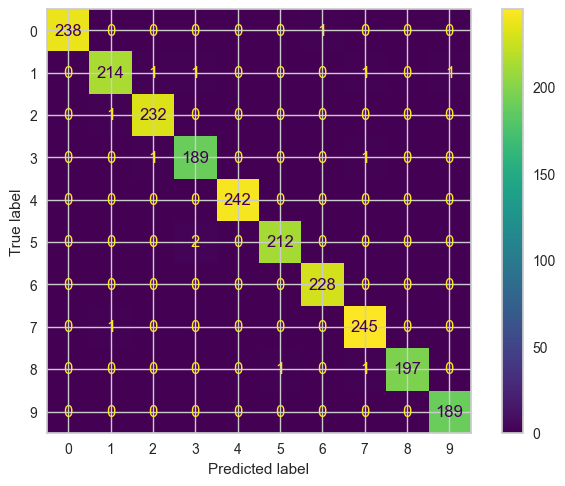

In [36]:
ConfusionMatrixDisplay.from_estimator(pipeSVC,X_test, y_test,xticks_rotation=0)

In [37]:
from sklearn.model_selection import cross_validate

In [38]:
operations = [("scaler", MinMaxScaler()),
              ("SVC", SVC())]
model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring = ['accuracy', 
                                   'precision_weighted',
                                   'recall_weighted',
                                   'f1_weighted'], 
                        cv = 5, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.993290
train_accuracy              0.994797
test_precision_weighted     0.993326
train_precision_weighted    0.994805
test_recall_weighted        0.993290
train_recall_weighted       0.994797
test_f1_weighted            0.993280
train_f1_weighted           0.994793
dtype: float64

#### SVC GridsearchCV

In [39]:
param_grid = {'SVC__C': np.linspace(1,1.3,10),
              'SVC__gamma': ["scale", "auto"],
              'SVC__kernel': ['rbf','linear']}
operations = [("scaler", MinMaxScaler()), ("SVC", SVC())]
pipeSVMgrid = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipeSVMgrid,
                              param_grid,
                              scoring='recall_weighted',
                              cv=5,
                              return_train_score=True)

In [40]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall_weighted')

In [41]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVC', SVC(C=1.2333333333333334))])

In [42]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238   0   0   0   0   0   1   0   0   0]
 [  0 214   1   1   0   0   0   1   0   1]
 [  0   1 232   0   0   0   0   0   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   2   0 212   0   0   0   0]
 [  0   0   0   0   0   0 228   0   0   0]
 [  0   1   0   0   0   0   0 245   0   0]
 [  0   0   0   0   0   1   0   1 197   0]
 [  0   0   0   0   0   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.98      0.99       218
           2       0.99      1.00      0.99       233
           3       0.98      0.99      0.99       191
           4       1.00      1.00      1.00       242
           5       1.00      0.99      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      1.00      0.99       246
           8       1.00      0.99      0.99       199
           9       

In [43]:
operations = [("scaler", MinMaxScaler()),
              ("SVC", SVC(C=1.2333333333333334))]
model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring = ['accuracy', 
                                   'precision_weighted',
                                   'recall_weighted',
                                   'f1_weighted'], 
                        cv = 5, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.994200
train_accuracy              0.995565
test_precision_weighted     0.994233
train_precision_weighted    0.995571
test_recall_weighted        0.994200
train_recall_weighted       0.995565
test_f1_weighted            0.994193
train_f1_weighted           0.995563
dtype: float64

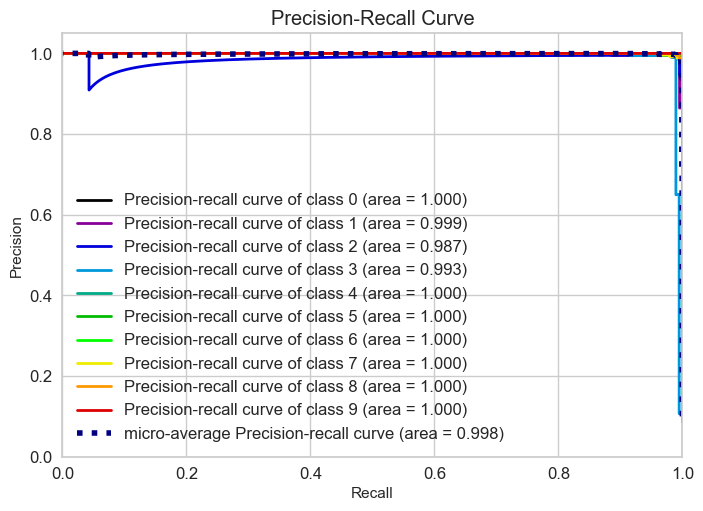

In [44]:
from scikitplot.metrics import plot_precision_recall,plot_roc_curve, plot_roc
operations = [("scaler", MinMaxScaler()),
              ("SVC", SVC(C=1.2333333333333334,probability=True))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Implement Decision Tree Classifier
- Import the modul
- Fit the model
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

### Implement Random Forest Classifier
- Import the modul
- Fit the model
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

#### Vanilla RF

In [46]:
operations = [("RF", RandomForestClassifier(random_state=101))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('RF', RandomForestClassifier(random_state=101))])

In [47]:
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[239   0   0   0   0   0   0   0   0   0]
 [  0 214   2   1   0   0   0   0   0   1]
 [  0   2 231   0   0   0   0   0   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 210   0   0   0   1]
 [  0   0   0   0   1   0 227   0   0   0]
 [  0   1   0   1   0   0   0 244   0   0]
 [  0   0   0   0   0   1   0   1 197   0]
 [  0   0   0   0   0   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.98      0.98       218
           2       0.99      0.99      0.99       233
           3       0.97      0.99      0.98       191
           4       1.00      1.00      1.00       242
           5       1.00      0.98      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      0.99      0.99       246
           8       1.00      0.99      0.99       199
           9       

In [48]:
operations = [("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.990447
train_accuracy           1.000000
test_precision_micro     0.990447
train_precision_micro    1.000000
test_recall_micro        0.990447
train_recall_micro       1.000000
test_f1_micro            0.990447
train_f1_micro           1.000000
dtype: float64

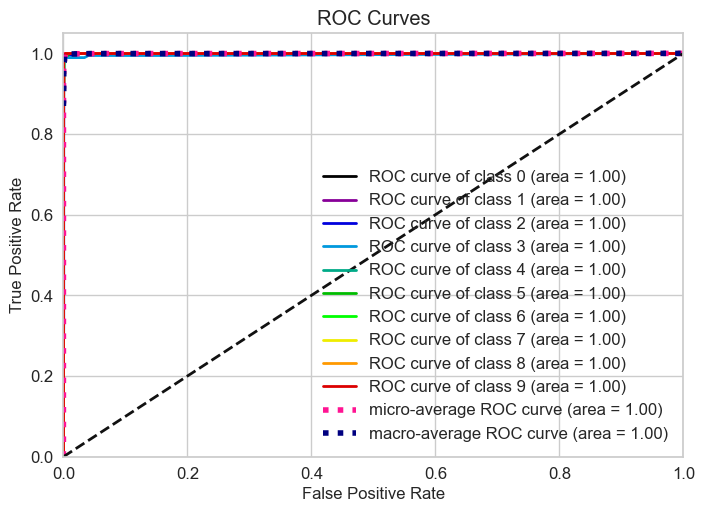

In [49]:
operations = [("RF", RandomForestClassifier(random_state=101))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)
y_pred_probe = model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

#### RF GridsearchCV

In [50]:
param_grid = {'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }
model = RandomForestClassifier(random_state=101)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring="accuracy",
                             n_jobs = -1,
                            return_train_score=True)
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

In [51]:
rf_grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=180, random_state=101)

In [52]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.983055
mean_train_score    0.994683
Name: 13, dtype: object

In [53]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[239   0   0   0   0   0   0   0   0   0]
 [  0 202  10   4   0   1   0   0   0   1]
 [  0   1 231   0   0   0   0   1   0   0]
 [  0   0   1 188   0   0   0   1   0   1]
 [  0   0   0   0 241   0   0   0   0   1]
 [  0   0   0   6   0 207   0   0   0   1]
 [  0   0   1   0   0   0 227   0   0   0]
 [  0   2   0   0   0   0   1 242   1   0]
 [  1   0   0   0   0   0   0   1 197   0]
 [  0   0   0   0   0   1   0   0   0 188]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.93      0.96       218
           2       0.95      0.99      0.97       233
           3       0.95      0.98      0.97       191
           4       1.00      1.00      1.00       242
           5       0.99      0.97      0.98       214
           6       1.00      1.00      1.00       228
           7       0.99      0.98      0.99       246
           8       0.99      0.99      0.99       199
           9       

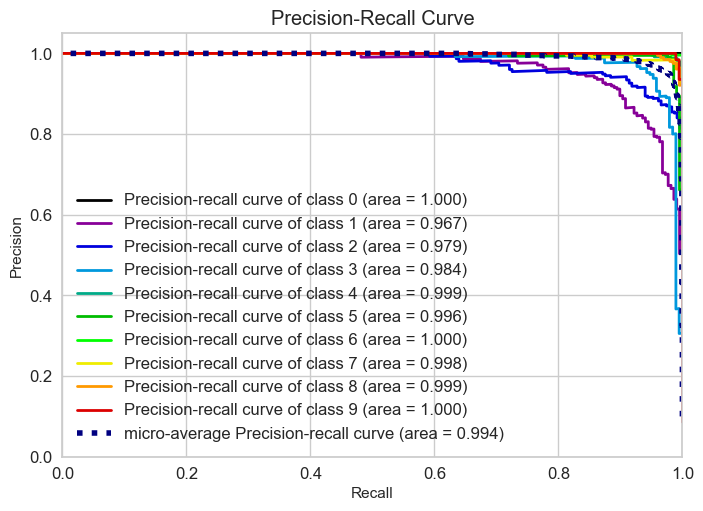

In [54]:
operations_rf = [("RF_model",
                  RandomForestClassifier(
             max_depth=7, n_estimators=300, random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Implement XGBoost Classifer
- Import the modul
- Fit the model
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

#### Vanilla XGB

In [55]:
operations_xgb = [("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [56]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[239   0   0   0   0   0   0   0   0   0]
 [  0 215   1   1   0   0   0   0   0   1]
 [  0   2 230   0   0   0   0   1   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 211   0   0   0   0]
 [  0   0   0   0   1   0 227   0   0   0]
 [  0   1   0   0   0   0   0 243   1   1]
 [  0   0   0   0   0   0   1   1 196   1]
 [  0   0   0   1   0   0   0   0   0 188]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.99      0.99      0.99       218
           2       0.99      0.99      0.99       233
           3       0.97      0.99      0.98       191
           4       1.00      1.00      1.00       242
           5       1.00      0.99      0.99       214
           6       1.00      1.00      1.00       228
           7       0.99      0.99      0.99       246
           8       0.99      0.98      0.99       199
           9       

#### XBGClassifier GridsearchCV

In [57]:
param_grid = {
    "XGB_model__n_estimators": [100,130],
    "XGB_model__max_depth": [2,4],
    "XGB_model__learning_rate": [0.3, 0.5],
    "XGB_model__subsample": [0.2, 0.5],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [58]:
operations_xgb = [
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [59]:
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constra...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.3, 0.5],
                         'XGB_model__max_depth': [2, 4],
                         'XGB_model__n_estimators': [100, 130],
                         'XGB_model__subsample': [0.2, 0.5]},
             return_train_score=True, scoring='accuracy')

In [60]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=130, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [61]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.5,
 'XGB_model__max_depth': 4,
 'XGB_model__n_estimators': 130,
 'XGB_model__subsample': 0.5}

In [62]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.991698
mean_train_score         1.0
Name: 15, dtype: object

In [63]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[239   0   0   0   0   0   0   0   0   0]
 [  0 216   1   1   0   0   0   0   0   0]
 [  0   2 229   0   0   0   0   2   0   0]
 [  0   0   1 189   0   0   0   1   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 211   0   0   0   0]
 [  0   0   0   0   1   0 227   0   0   0]
 [  0   1   0   0   0   0   0 243   2   0]
 [  0   0   0   0   0   1   1   1 196   0]
 [  0   1   0   0   0   0   0   0   0 188]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.98      0.99      0.99       218
           2       0.99      0.98      0.99       233
           3       0.98      0.99      0.98       191
           4       1.00      1.00      1.00       242
           5       1.00      0.99      0.99       214
           6       1.00      1.00      1.00       228
           7       0.98      0.99      0.99       246
           8       0.99      0.98      0.99       199
           9       

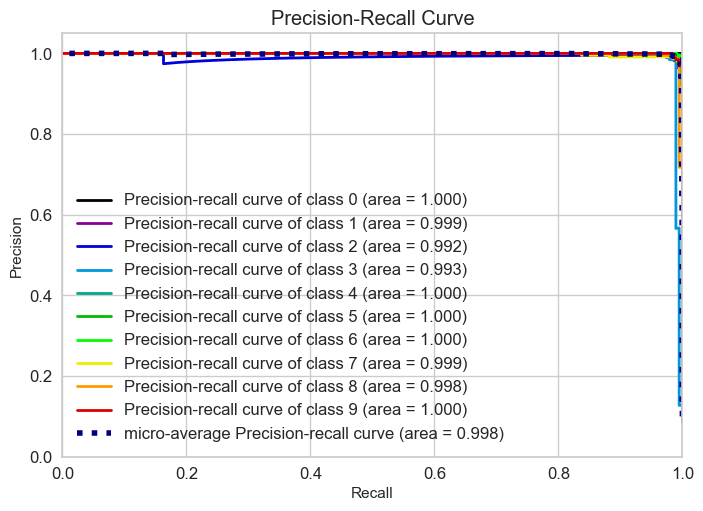

In [64]:
model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

# Conclusion

- All four models has pretty  good scores.
- However, in the real world scenario, score not the only thing to consider.
- If you need explanable model, DT is the only option
- In this context, which algorithm to choose for deployment is the subject of the business problem we plan to solve.